# 데이터 증강 (Augmentation)

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras
import tensorflow as tf
import numpy as np
from numpy  import expand_dims
import cv2
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
np.random.seed(15)

Using TensorFlow backend.


# 1. Data Augmentation
dataset이 너무 적으면 overfitting 발생하므로  
data를 뻥튀기  


random factor 섞어서 noise 추가.  
noise 적절히 섞어야지 다 넣으면 역효과.  

크게 세 단계.  
- 어떤 기하변형을 할 지 (generator)
- flow - 이미지, 폴더, 저장 설정
- next - 위의 내용들로 적용

In [3]:
img = tf.keras.preprocessing.image.load_img('img/cat.jpg')  # 이미지 객체임. PIL type.
data = tf.keras.preprocessing.image.img_to_array(img)   # data 만 추출  #image to numpy object
sample = expand_dims(data,0)  #한 차원 늘려줌.
print(data.shape)
print(sample.shape)  #(1,414,500,3):(샘플수,이미지크기w,h,컬러채널수)

(266, 400, 3)
(1, 266, 400, 3)


In [7]:
# opencv 사용해 이미지 loaidng
data = cv2.imread('img/cat.jpg')
data = cv2.cvtColor(data, cv2.COLOR_BGR2RGB)  #RGB 변환 잊지 마
sample = expand_dims(data,0)
print(sample.shape)

(1, 266, 400, 3)


### 수평, 수직 이동

In [29]:
#generator: 환경설정 같은 것. 잘 안 변함
generator = tf.keras.preprocessing.image.ImageDataGenerator(    
    width_shift_range = 0.2)

obj = generator.flow(sample, batch_size=1)   #flow:계산해라. #한다고 해서 객체 생성되는게 아님. 이런 조건으로 이미지를 만들게~ 실제 객체 만들려면 next 함수 호출해야 함.

In [14]:
#할때마다 다른 이미지 나온다.
image = obj.next()  #next 함수 호출해야 객체 생성됨.
print(image.shape)  #(1, 266, 400, 3) 4차원임
print(image[0].shape)  #첫번째 이미지 w,h,color channel
print(image.dtype)  #입력이랑 다르네. float로 출력됨.
print(image)

(1, 266, 400, 3)
(266, 400, 3)
float32
[[[[215.       215.       215.      ]
   [215.       215.       215.      ]
   [215.       215.       215.      ]
   ...
   [ 61.919212  54.919212  48.919212]
   [ 64.95153   55.        52.935368]
   [ 65.        55.        53.      ]]

  [[215.       215.       215.      ]
   [215.       215.       215.      ]
   [215.       215.       215.      ]
   ...
   [ 61.935368  54.935368  48.935368]
   [ 65.93537   55.98384   53.919212]
   [ 66.        56.        54.      ]]

  [[215.       215.       215.      ]
   [215.       215.       215.      ]
   [215.       215.       215.      ]
   ...
   [ 61.919212  52.919212  47.919212]
   [ 63.967686  54.967686  49.967686]
   [ 64.98384   55.98384   50.98384 ]]

  ...

  [[183.       185.       184.      ]
   [183.       185.       184.      ]
   [183.       185.       184.      ]
   ...
   [232.95152  232.95152  232.95152 ]
   [234.96768  234.96768  234.96768 ]
   [236.96768  236.96768  236.96768 ]]

  [[18

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


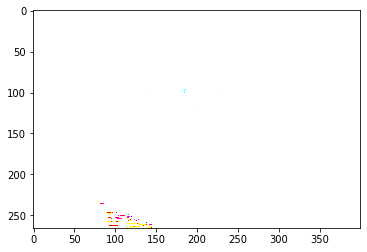

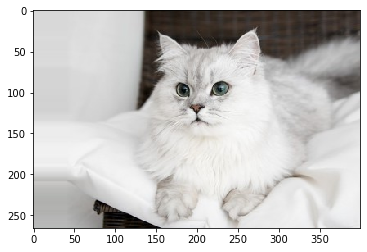

In [16]:
#  plt로 할때는 0~1사이로  혹은 타입을 uint8로 
#plot 방법이 두 가지 있다.
plt.imshow(image[0]) #type=float이면 채널범위를 0~1로 인식해. 이렇게 하면 다 1보다 크니까 올화이트로 나와..
plt.show()
#plt.imshow(image[0].astype('uint8') )
plt.imshow(image[0]/255)
plt.show()

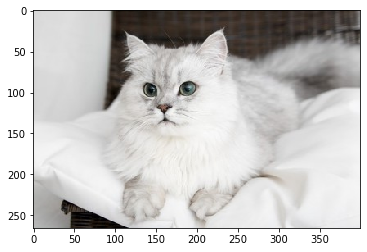

In [28]:
#next함수 시행할 때마다 generator 안에 있는 영상처리 방법을 batch 수만큼 시행한다.
image = obj.next()  #next 함수 호출해야 객체 생성됨.
plt.imshow(image[0]/255)
plt.show()

In [ ]:
#generator: 환경설정 같은 것. 잘 안 변함
generator = tf.keras.preprocessing.image.ImageDataGenerator(    
    width_shift_range = 0.2, rescale=1./255)  #rescale:값을 정규화하고 imshow

obj = generator.flow(sample, batch_size=1)

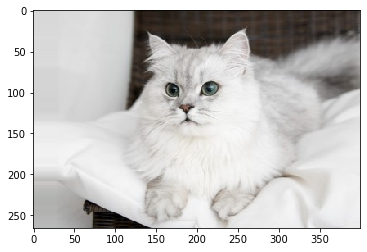

In [31]:
#next함수 시행할 때마다 generator 안에 있는 영상처리 방법을 batch 수만큼 시행한다.
image = obj.next()
plt.imshow(image[0])  #앞에 rescale 썼기때문에 0~1로 이미 저장되어 있음.
plt.show()

## flip

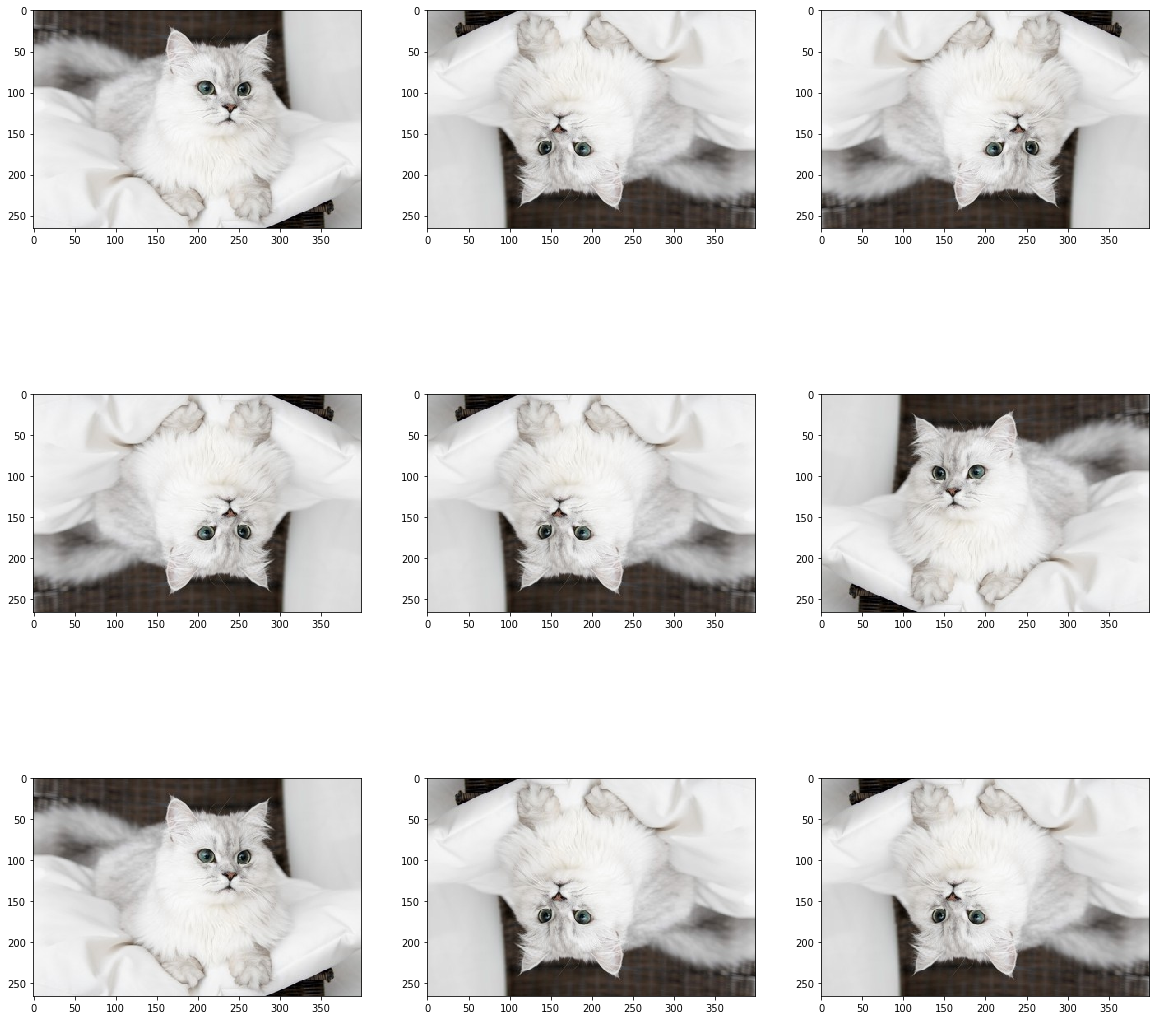

In [32]:
generator = tf.keras.preprocessing.image.ImageDataGenerator( 
    horizontal_flip = True, vertical_flip = True,
    rescale=1./255)
obj = generator.flow(sample, batch_size=1)   

fig = plt.figure(figsize=(20,20))
for i in range(9) :
    plt.subplot(3,3,i+1)
    image = obj.next()
    plt.imshow(image[0])   

## rotation

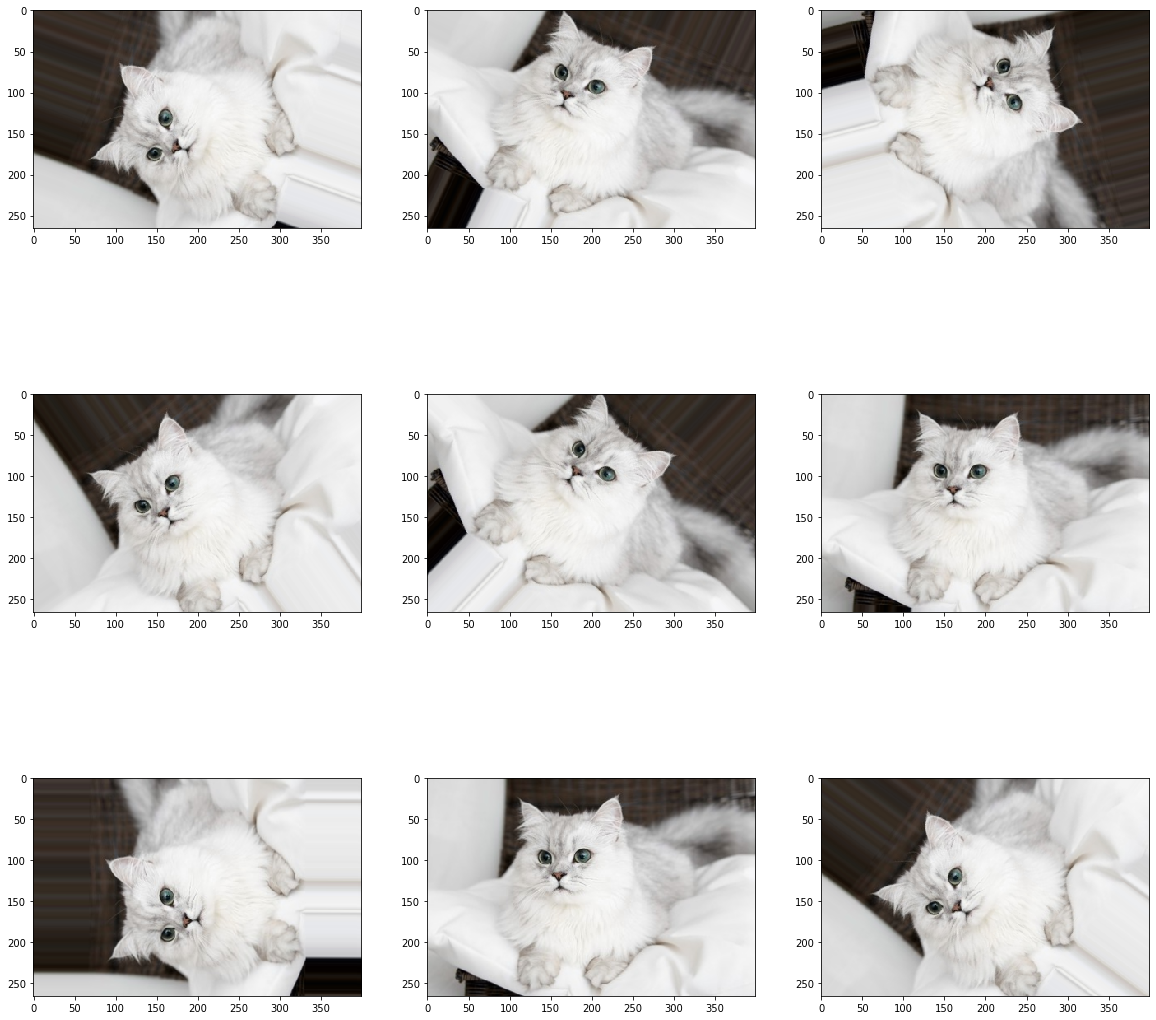

In [33]:
generator = tf.keras.preprocessing.image.ImageDataGenerator( 
    rotation_range=90,
    rescale=1./255)
obj = generator.flow(sample, batch_size=1)   

fig = plt.figure(figsize=(20,20))
for i in range(9) :
    plt.subplot(3,3,i+1)
    image = obj.next()
    plt.imshow(image[0])   
    

## brightness

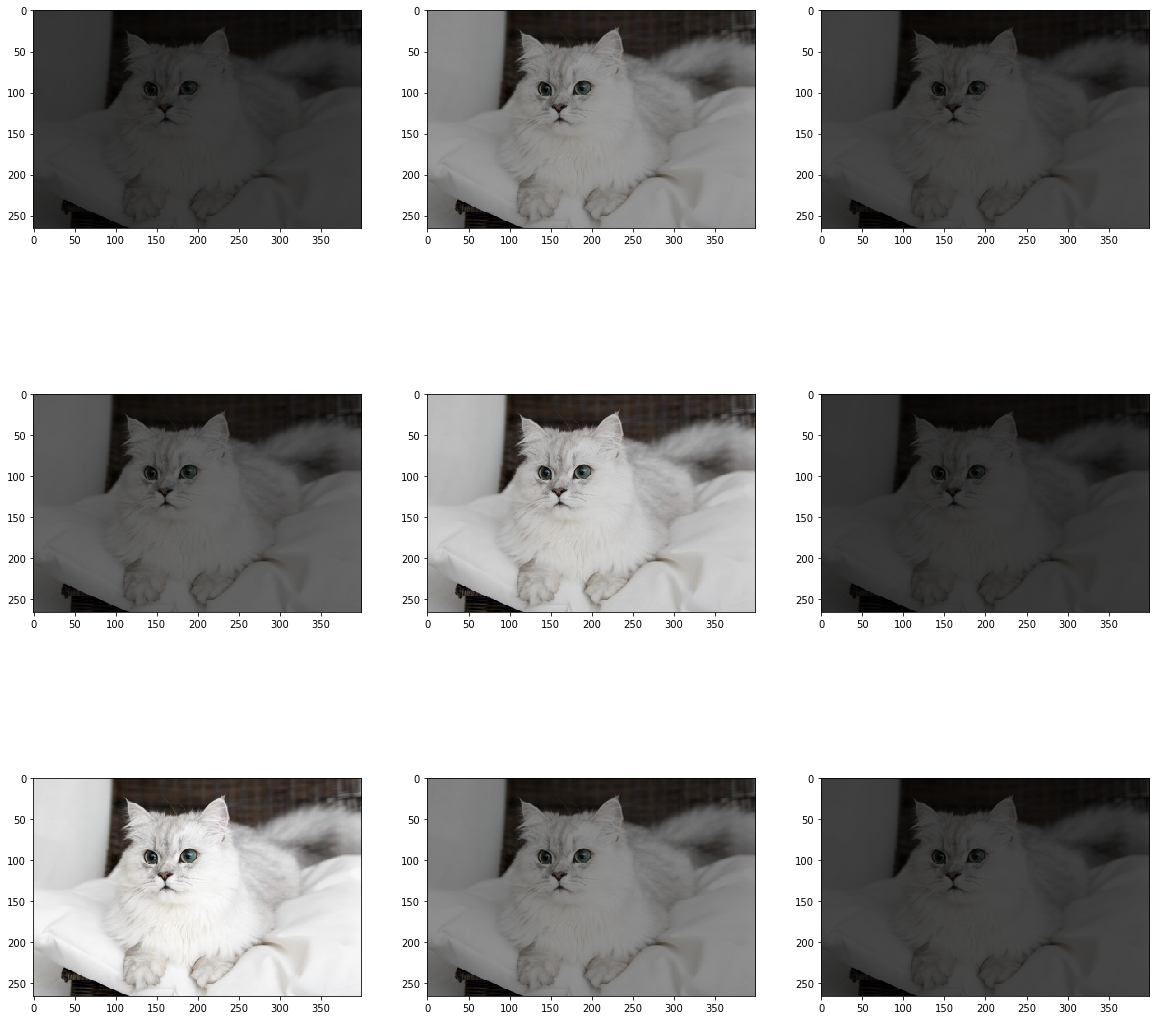

In [4]:
generator = tf.keras.preprocessing.image.ImageDataGenerator( 
    brightness_range=[0.2, 1.0],       
    rescale=1./255)
obj = generator.flow(sample, batch_size=1)   

fig = plt.figure(figsize=(20,20))
for i in range(9) :
    plt.subplot(3,3,i+1)
    image = obj.next()
    plt.imshow(image[0])   

## zoom

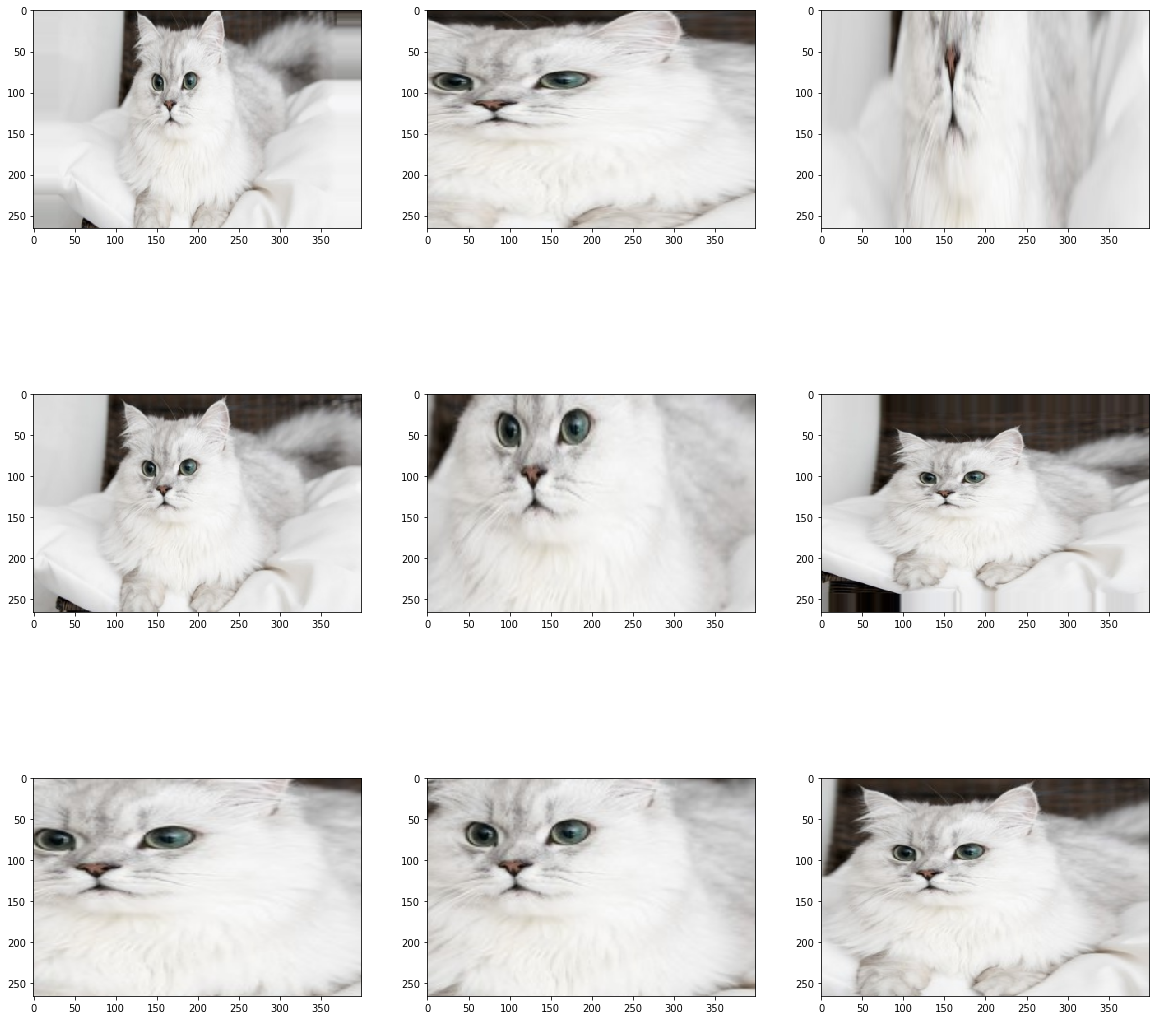

In [35]:
generator = tf.keras.preprocessing.image.ImageDataGenerator( 
    zoom_range=[0.2, 1.2],   
    rescale=1./255)
obj = generator.flow(sample, batch_size=1)   

fig = plt.figure(figsize=(20,20))
for i in range(9) :
    plt.subplot(3,3,i+1)
    image = obj.next()
    plt.imshow(image[0])   

영상 크기가 절대 바뀔 수 없어. 잘리거나 빈공간 생겨도 매꿔져.  
항상 영상 크기는 유지.  

batch_size: 넘겨준 데이터에서 n개만 사용해라. 생성할 data 갯수

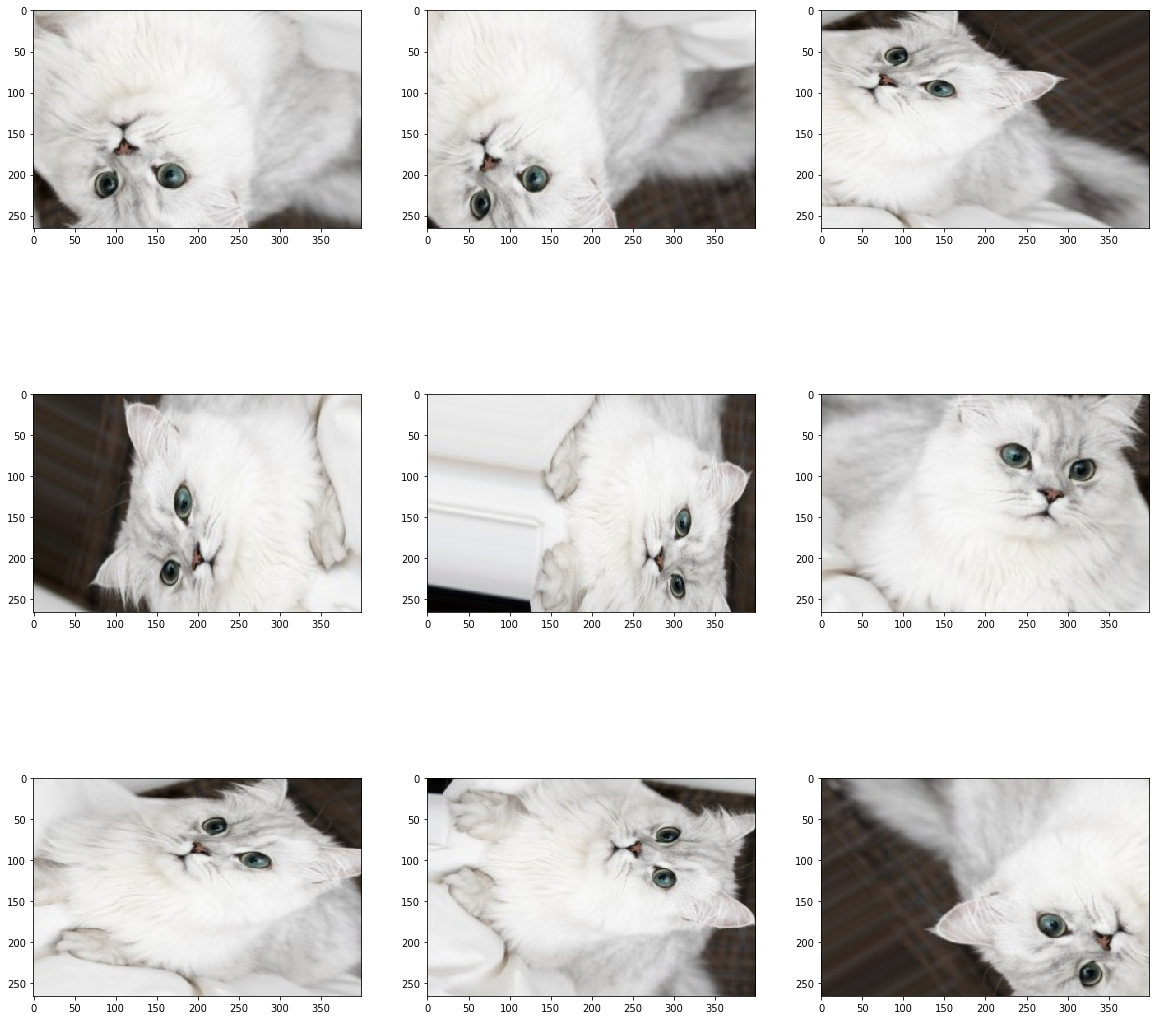

In [36]:
# 한꺼번에 적용하기
generator = tf.keras.preprocessing.image.ImageDataGenerator( 
    width_shift_range = 0.2,
    zoom_range=[0.5, 1.0],   
    horizontal_flip = True, vertical_flip = True,
    rotation_range=90,
    rescale=1./255)  #rescale은 거의 필수
obj = generator.flow(sample, batch_size=1)   

fig = plt.figure(figsize=(20,20))
for i in range(9) :
    plt.subplot(3,3,i+1)
    image = obj.next()
    plt.imshow(image[0])   

In [5]:
# 파일로 저장하기
obj = generator.flow(sample, batch_size=1, save_to_dir='tmp',  # 폴더는 생성되어 있어야 함
    save_prefix="cat", save_format="jpg")    #메모리로도 생성되지만 file로도 저장되게 함.

for i in range(0, 5):
    obj.next()    

In [6]:
# 2.  디렉토리로 부터 augmentation
#augsample/c1/2개 이미지
#augsample/c2/6개 이미지    
#augsample/c3/1개 이미지    

obj = generator.flow_from_directory(
    'hard_handwriting_shape', #이 폴더 밑에 있는 데이터 다 읽음
    target_size = (150, 150),   # 읽어들일 이미지, 이미지 크기를 맞춰야 하기 때문에 생략시 256x256
    batch_size = 4,   # 8개 이미지 중에서 한번에 생성할 이미지 수 
    class_mode = 'binary' )  # # binary(label)  |  categorical(one-hot)

Found 75 images belonging to 3 classes.


75개 이미지, classes는 폴더별로.

In [7]:
iterations = 2  #loop를 2번 돎.

for i, (img, label) in enumerate(obj):  #img:4차원, label:1차원
    n_img = len(label)    # 폴더에 있는 이미지 갯수 만큼 리턴한다.
    print(label)
    print(img.shape)
    if i is iterations - 1:
        break      
# 결과를 보면 lable은 1,1,1,0 처럼 꼭 c1과 c2에서 규일하게 생성되는것은 아니다.

[0. 2. 2. 2.]
(4, 150, 150, 3)
[2. 0. 2. 1.]
(4, 150, 150, 3)


[0. 2. 2. 2.]    배치사이즈가 4이므로 전체 75개 중에 4개 가져온 것임.  


In [8]:
# categorical 로 한다면... 표현만 다를 뿐.
obj = generator.flow_from_directory(
    'hard_handwriting_shape', #이 폴더 밑에 있는 데이터 다 읽음
    target_size = (150, 150),   # 읽어들일 이미지, 이미지 크기를 맞춰야 하기 때문에 생략시 256x256
    batch_size = 4,   # 8개 이미지 중에서 한번에 생성할 이미지 수 
    class_mode = 'categorical' )  # # binary(label)  |  categorical(one-hot)
iterations = 2  #loop를 2번 돎.

for i, (img, label) in enumerate(obj):  #img:4차원, label:1차원
    n_img = len(label)    # 폴더에 있는 이미지 갯수 만큼 리턴한다.
    print(label)
    print(img.shape)
    if i is iterations - 1:
        break      
# 결과를 보면 lable은 1,1,1,0 처럼 꼭 c1과 c2에서 규일하게 생성되는것은 아니다.

Found 75 images belonging to 3 classes.
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
(4, 150, 150, 3)
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
(4, 150, 150, 3)


In [10]:
# 저장하기
obj = generator.flow_from_directory(
    'hard_handwriting_shape',
    target_size = (150, 150),   # 읽어드릴 이미지, 이미지 크기를 맞춰야 하기 때문에 생략시 256x256
    batch_size = 4,   # 8개 이미지 중에서 최대4개 만들어냄
    class_mode = 'binary',
    save_prefix="image", save_format="jpg",save_to_dir='hard_handwriting_shape/tmp')

iterations = 2

for i, (img, label) in enumerate(obj):
    n_img = len(label)    # 폴더에 있는 이미지 갯수 만큼 리턴한다.
    print(label)
    print(img.shape)
    if i is iterations - 1:
        break
# aug 폴더하나에 8개이미지 출력됙다.  class별로 저정할수 없나?( 좀 더 찾아바야함)

Found 75 images belonging to 3 classes.
[1. 2. 1. 1.]
(4, 150, 150, 3)
[2. 1. 2. 1.]
(4, 150, 150, 3)


# 2. 도형

In [54]:
np.random.seed(5)


# 데이터셋 불러오기
data_aug_gen = ImageDataGenerator(rescale=1./255, 
                                  rotation_range=15,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.5,              #찌그러트림
                                  zoom_range=[0.8, 2.0],
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  fill_mode='nearest')          #빈 공간 채울 때 모드
                                   
img = load_img('hard_handwriting_shape/train/triangle/triangle001.png')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0

# 이 for는 무한으로 반복되기 때문에 우리가 원하는 반복횟수를 지정하여, 지정된 반복횟수가 되면 빠져나오도록 해야합니다.
for batch in data_aug_gen.flow(x, batch_size=1, save_to_dir='hard_handwriting_shape/tmp', save_prefix='tri', save_format='png'):
    i += 1
    if i > 30: 
        break
        

In [55]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.7,
                                   zoom_range=[0.9, 2.2],
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        'hard_handwriting_shape/train',
        target_size=(24, 24),
        batch_size=3,                    #생성할 때마다 데이터 3개를 참조하겠다
        class_mode='categorical')

#test data를 다시 읽을 필요 없다. 기하학적 변형 안 하고 test data 쉽게 읽을 수 있다.
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'hard_handwriting_shape/test',
        target_size=(24, 24),    
        batch_size=3,
        class_mode='categorical', shuffle=False)

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [56]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(24,24,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

# 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
# 모델 학습시키기
model.fit_generator(
        train_generator,
        steps_per_epoch=15 * 100,
        epochs=2, #200
        validation_data=test_generator,
        validation_steps=5)

Epoch 1/2
1500/1500 [==============================] - 14s 9ms/step - loss: 0.1955 - accuracy: 0.9216 - val_loss: 9.0429e-04 - val_accuracy: 0.8000
Epoch 2/2
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0327 - accuracy: 0.9900 - val_loss: 2.7815e-07 - val_accuracy: 0.8000


In [18]:
# 모델 학습시키기_20epochs
model.fit_generator(
        train_generator,
        steps_per_epoch=15 * 100,
        epochs=20, #200
        validation_data=test_generator,
        validation_steps=5)

Epoch 1/20
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0064 - accuracy: 0.9982 - val_loss: 3.9736e-08 - val_accuracy: 0.8000
Epoch 2/20
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0169 - accuracy: 0.9951 - val_loss: 3.9736e-08 - val_accuracy: 0.8000
Epoch 3/20
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0129 - accuracy: 0.9956 - val_loss: 0.0000e+00 - val_accuracy: 0.7333
Epoch 4/20
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0088 - accuracy: 0.9973 - val_loss: 1.9868e-07 - val_accuracy: 0.7333
Epoch 5/20
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0039 - accuracy: 0.9980 - val_loss: 0.0000e+00 - val_accuracy: 0.7333
Epoch 6/20
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0200 - accuracy: 0.9949 - val_loss: 2.3842e-07 - val_accuracy: 0.7333
Epoch 7/20
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0048 - accuracy: 0.9980 - v

In [60]:
# 모델 예측하기
print("-- Predict --")
output = model.predict_generator( test_generator,  steps = 5)    # batch 사이즈가 3 , 15개가 생성됨  #예측이 아니라, 계산해라는 predict
print(output)

T = test_generator.classes
print(T)
p = np.argmax(output, axis=1)
print(p)

sum((T == p)*1) / len(T)

-- Predict --
[[8.9358562e-01 1.6735174e-02 8.9679226e-02]
 [2.3137140e-05 2.7271014e-06 9.9997413e-01]
 [9.7433996e-01 5.9433085e-09 2.5660044e-02]
 [9.9997532e-01 2.3055208e-07 2.4460498e-05]
 [9.7495848e-01 2.6725157e-08 2.5041543e-02]
 [3.3298380e-05 9.9996340e-01 3.3241315e-06]
 [9.1211518e-09 6.7933597e-06 9.9999321e-01]
 [1.0616904e-02 9.8927224e-01 1.1091098e-04]
 [3.3904740e-08 9.9999988e-01 5.6804673e-08]
 [4.2450264e-02 3.9770987e-04 9.5715195e-01]
 [3.0211024e-05 1.0784694e-05 9.9995911e-01]
 [2.4794797e-06 3.2109024e-09 9.9999750e-01]
 [2.9402031e-07 1.2126101e-08 9.9999976e-01]
 [4.6973690e-07 8.5875985e-12 9.9999952e-01]
 [8.1717480e-12 2.6900254e-13 1.0000000e+00]]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]
[0 2 0 0 0 1 2 1 1 2 2 2 2 2 2]


0.8

----------------------

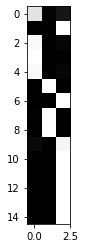

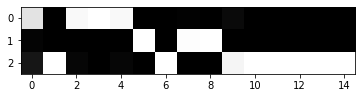

In [61]:
plt.imshow(output, cmap="gray")
plt.show()

plt.imshow(output.T, cmap="gray")  #transpose
plt.show()

In [62]:
# 모델 평가하기
scores = model.evaluate_generator( test_generator, steps = 5)
print(scores[1])

0.800000011920929


In [63]:
#위를 bar graph로 나타내보자
labels = ['c', 'r', 't']

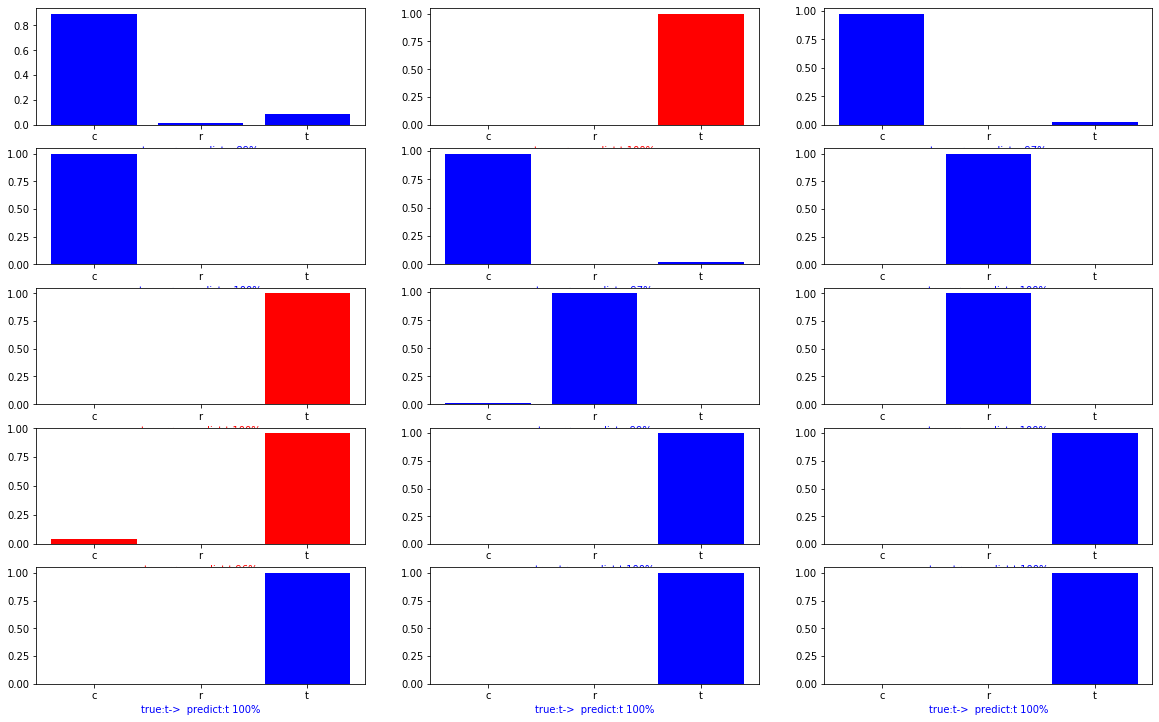

In [66]:
idx = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]

plt.figure(figsize=(20, 15))

cc = 3
rr = int(len(idx) / cc) + 1

for k in range(len(idx)):
         i = idx[k]             
         c = "blue" if  p[i] == T[i]   else "red"    #blue if predict value=true value
         plt.subplot( rr ,cc, k+1)
         plt.bar(labels, output[i], color=c)
         plt.xlabel("true:{}->  predict:{} {:2.0f}%".format(labels[int(T[  i ])], labels[p[  i ]],  100*np.max(output[i], axis=0)),  color = c )

데이터 augmentation하면 원본 데이터도 학습에 사용할까?  
기본적으로 포함 안 되어 있음, 미포함을 권장  
원본데이터가 중복되어 학습하게 됨..  
원본데이터는 뻥튀기 용도로만 사용.

Found 15 images belonging to 3 classes.


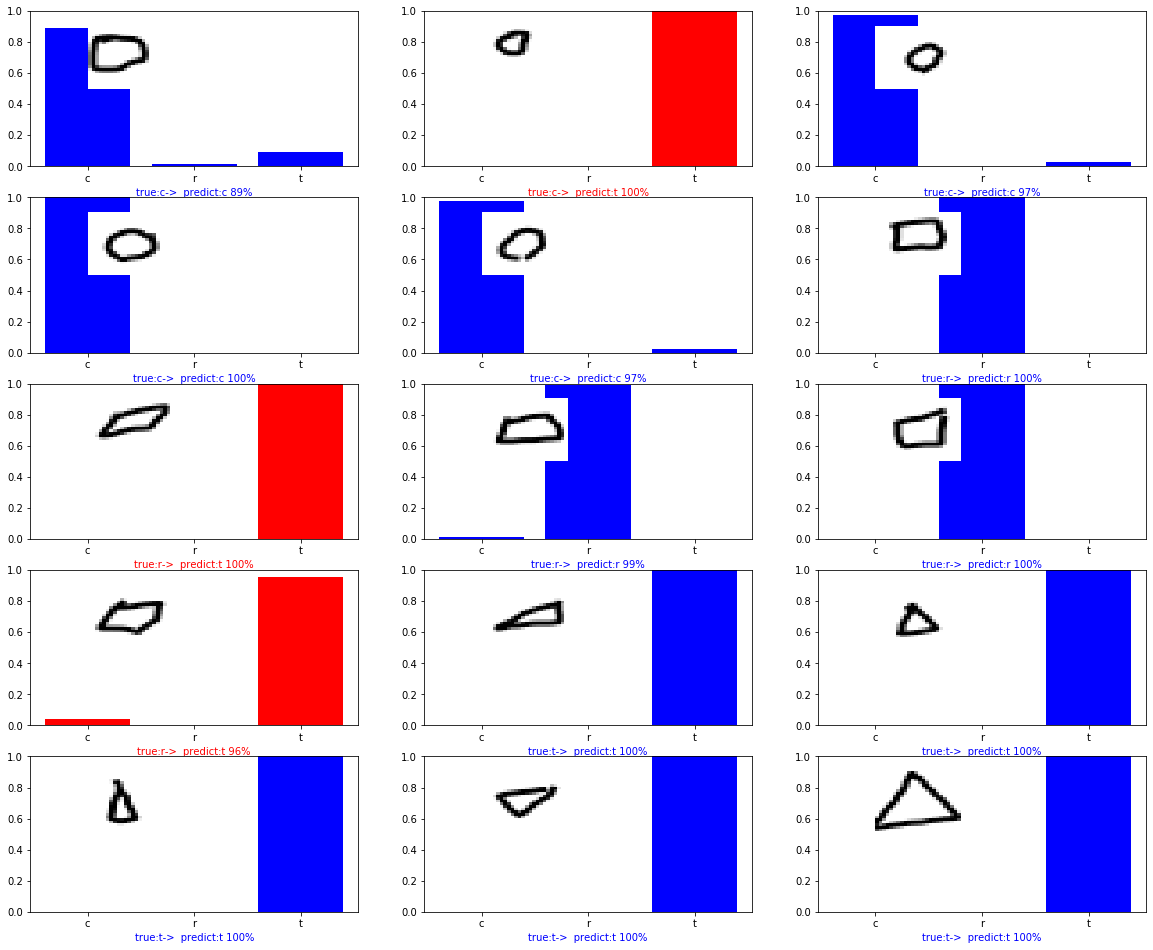

In [94]:
test_generator = test_datagen.flow_from_directory(
        'hard_handwriting_shape/test',
        target_size=(24, 24),    
        batch_size=15,                        #3은 안되고 15하니 됨..
        class_mode='binary', shuffle=False)
X,T = test_generator.next()
output = model.predict(X)
p=np.argmax(output, axis=1)


idx = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
#위에 대신 아래처럼 사용하면 틀린 것만 나옴.
#idx = np.where(p!=T)
#idx=idx[0]
plt.figure(figsize=(20, 20))

cc = 3
rr = int(len(idx) / cc)+1

for k in range( len(idx) ) :        
    i = idx[k]             
    c = "blue" if  p[i] == T[i]   else "red"    
    plt.subplot( rr ,cc, k+1)
    #  left and right limits, and the bottom and top limits. 
    plt.imshow(X[i, :,:, 0], extent=[0, 0.8, 0.5, 0.9], aspect='auto', zorder=10, cmap="gray")
    plt.ylim(0.0, 1.0)  
    plt.bar(labels, output[i], color=c)
    plt.xlabel("true:{}->  predict:{} {:2.0f}%".format(labels[int(T[  i ])], labels[p[  i ]],  100*np.max(output[i], axis=0)),  color = c )
    
plt.savefig('fig1.png')

Found 15 images belonging to 3 classes.


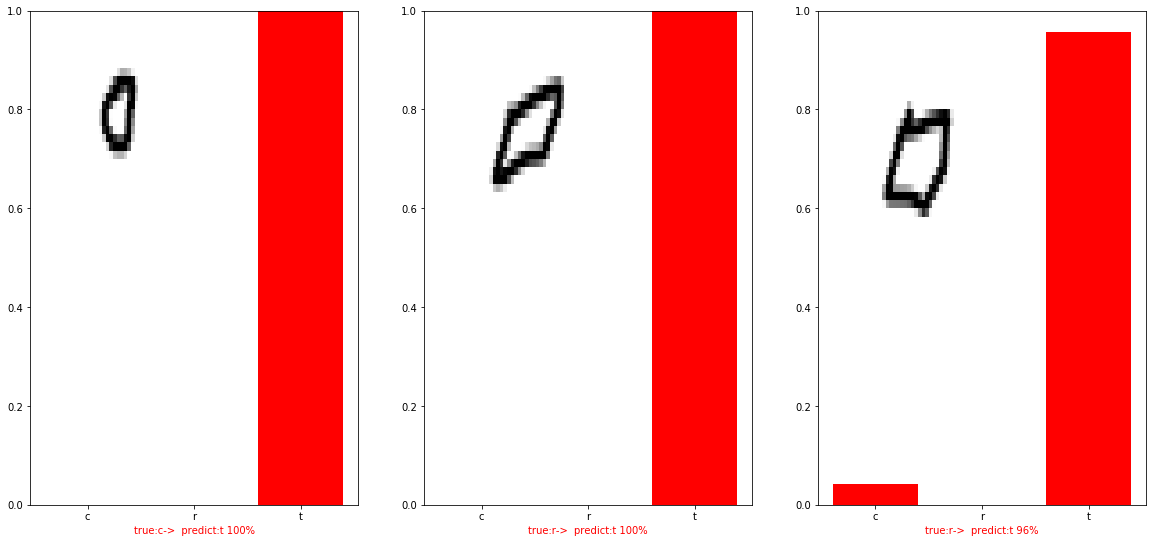

In [97]:
test_generator = test_datagen.flow_from_directory(
        'hard_handwriting_shape/test',
        target_size=(24, 24),    
        batch_size=15, 
        class_mode='binary', shuffle=False)
X,T = test_generator.next()
output = model.predict(X)
p=np.argmax(output, axis=1)


idx = np.where(p!=T)
idx=idx[0]
plt.figure(figsize=(20, 20))

cc = 3
rr = int(len(idx) / cc)+1

for k in range( len(idx) ) :        
    i = idx[k]             
    c = "blue" if  p[i] == T[i]   else "red"    
    plt.subplot( rr ,cc, k+1)
    #  left and right limits, and the bottom and top limits. 
    plt.imshow(X[i, :,:, 0], extent=[0, 0.8, 0.5, 0.9], aspect='auto', zorder=10, cmap="gray")
    plt.ylim(0.0, 1.0)  
    plt.bar(labels, output[i], color=c)
    plt.xlabel("true:{}->  predict:{} {:2.0f}%".format(labels[int(T[  i ])], labels[p[  i ]],  100*np.max(output[i], axis=0)),  color = c )
    
plt.savefig('fig2.png')

# 3. dog cat  augmentatation

- https://keraskorea.github.io/posts/2018-10-24-little_data_powerful_model/
- https://www.kaggle.com/c/dogs-vs-cats/data
- 학습 데이터로 1,000장의 고양이 사진과 1,000장의 강아지 사진을 사용 (kaggle  25,000자)
- 검증 데이터로는 각각 400장 사용